<a href="https://colab.research.google.com/github/Abdul-Lahad/PyTorch-Tutorial/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Network
### CNN Overview

- CNNs are neural networks designed for image data, using convolutional filters to extract features.
- Typical architecture includes convolutional layers, activation functions (e.g., ReLU), pooling layers, and fully connected layers for classification.

### Convolutional Filters

- Filters slide over the image, performing element-wise multiplication and summation to produce feature maps.
- Filters may reduce image size unless padding is applied.

### Pooling Layers

- Max pooling reduces computational cost by down-sampling images using a 2x2 filter and selecting maximum values.
- Helps reduce parameters and prevent overfitting.

### Data Preparation and Loading

- The CIFAR-10 dataset is loaded using PyTorch’s dataset module.
- Data is batched and optimized using data loaders for efficient training.

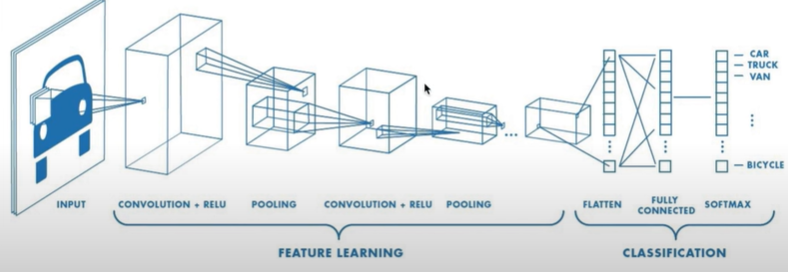

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [8]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

num_epochs = 10
batch_size = 4
learning_rate = 0.001

# dataset has PILImage of range [0,1]
# we transform them to Tensors of normalized range [-1,1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_dataset = torchvision.datasets.CIFAR10(root='./data',train=True,download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data',train=False,download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset,batch_size=batch_size,shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,shuffle=False)

classes = ('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')






Files already downloaded and verified
Files already downloaded and verified


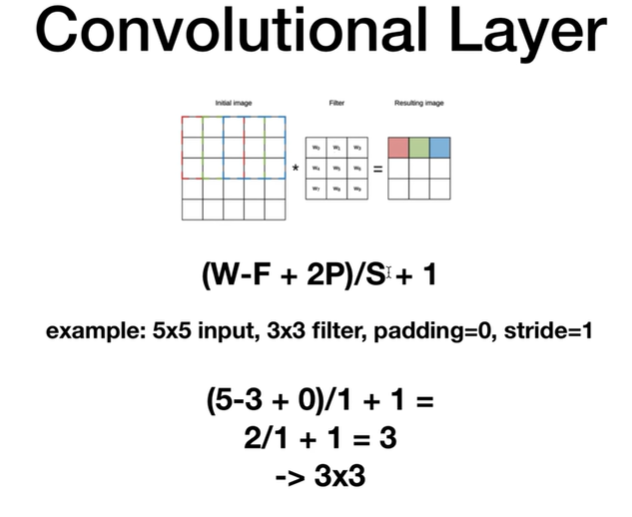

In [6]:
class ConvNet(nn.Module):
  def __init__(self):
    super(ConvNet, self).__init__()
    self.conv1 = nn.Conv2d(3, 6, 5) # 3 output chenels (INPUT) , 6 is output chenels(NEXT INPUT,OUPUT), 5 is the filter size
    self.pool = nn.MaxPool2d(2,2)  # devide the inputsize by 2
    self.conv2 = nn.Conv2d(6, 16, 5)
    # 16 Output chenel * (5 * 5) Image Size 5X5 (Size After Converting 3D to 1D tensor)
    self.fc1 = nn.Linear(16*5*5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1,16*5*5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x


model = ConvNet().to(device)

In [9]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

n_total_steps = len(train_loader)

for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    images = images.to(device)
    labels = labels.to(device)

    output = model(images)
    loss = criterion(output, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (i+1) % 2000 == 0:
      print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

print('Finished Training')


Epoch [1/10], Step [2000/12500], Loss: 1.4131
Epoch [1/10], Step [4000/12500], Loss: 1.1441
Epoch [1/10], Step [6000/12500], Loss: 0.2846
Epoch [1/10], Step [8000/12500], Loss: 0.3050
Epoch [1/10], Step [10000/12500], Loss: 0.4441
Epoch [1/10], Step [12000/12500], Loss: 1.0205
Epoch [2/10], Step [2000/12500], Loss: 0.9617
Epoch [2/10], Step [4000/12500], Loss: 0.8926
Epoch [2/10], Step [6000/12500], Loss: 0.3594
Epoch [2/10], Step [8000/12500], Loss: 0.5450
Epoch [2/10], Step [10000/12500], Loss: 2.2039
Epoch [2/10], Step [12000/12500], Loss: 1.0067
Epoch [3/10], Step [2000/12500], Loss: 0.7778
Epoch [3/10], Step [4000/12500], Loss: 1.5033
Epoch [3/10], Step [6000/12500], Loss: 0.8123
Epoch [3/10], Step [8000/12500], Loss: 0.7084
Epoch [3/10], Step [10000/12500], Loss: 1.5042
Epoch [3/10], Step [12000/12500], Loss: 0.4443
Epoch [4/10], Step [2000/12500], Loss: 0.3000
Epoch [4/10], Step [4000/12500], Loss: 0.9555
Epoch [4/10], Step [6000/12500], Loss: 0.4591
Epoch [4/10], Step [8000/125

In [10]:
with torch.no_grad():
  n_correct = 0
  n_samples = 0

  n_class_correct = [0 for i in range(10)]
  n_class_samples = [0 for i in range(10)]

  for images, labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)

    _, predicted = torch.max(outputs, 1)
    n_samples += labels.size(0) #adding 1
    n_correct += (predicted == labels).sum().item()


    for i in range(batch_size):
      label = labels[i]
      pred = predicted[i]
      if (label == pred):
        n_class_correct[label] += 1
      n_class_samples[label] += 1

  acc = 100.0 * n_correct / n_samples
  print(f'Accuracy of the network: {acc} %')

Accuracy of the network: 60.26 %
